<div class="alert alert-success">
Hey Hibatallah!
    
    
Such an amazing job! Frankly speaking, I am truly impressed by the progress that you've made. Your best performing model does great job. I would definitely like to take this model and move it to production, since it seems to be so good in churn prediction. Business will benefit a lot from having it.
    
    
The report is clear and neat. Each step is very well explained and described. I ended up with no questions at all after reading it.
    
    
My congratulations on the completion of the program! Your skills now are impressive! Pls, text me when you get a job offer, so we can congratulate it together ;)
    
Best, Anthony
</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, there's just one small problem that needs to be fixed berfore the code can be accepted. It should be pretty straightforward though. Good luck!

# Project description

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

## Interconnect's services

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.

Some other services the company provides include:
- Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
- A dedicated technical support line (TechSupport)
- Cloud file storage and data backup (OnlineBackup)
- TV streaming (StreamingTV) and a movie directory (StreamingMovies)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

**Data Description**
The data consists of files obtained from different sources:
- `contract.csv` — contract information

- `personal.csv` — the client's personal data

- `internet.csv` — information about Internet services

- `phone.csv` — information about telephone services

In each file, the column customerID contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

# Work plan 

# Table of Content

<div> 
    <ol>
      <li><a href="#1">Download and prepare the data</a></li>
      <li><a href="#2">Data Preparation</a></li>
      <li><a href="#3">Exloratory Data Analysis</a></li>
      <li><a href="#4">Model Training</a></li>
      <li><a href="#5">Final Testing</a></li>
      <li><a href="#5">Overall conclusion</a></li>
    </ol> 
</div>

# <a id="1">Download and prepare the data

In [1]:
!pip3 install CatBoost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import time
from datetime import datetime
from IPython.display import display

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn for statistical data visualization
import seaborn as sns

# import module for splitting and cross-validation using gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

# import modules for preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning after scaling

# import machine learning module from the sklearn library
from sklearn.dummy import DummyClassifier # import dummy classifier
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.linear_model import LogisticRegression # import logistic regression 
from sklearn.ensemble import RandomForestClassifier # import random forest algorithm
from catboost import CatBoostClassifier # import catboost classifier
from lightgbm import LGBMClassifier # import lightgbm classifier
from xgboost import XGBClassifier # import xgboost classifier

# import metrics for sanity check on model
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

# import warnings
import warnings
warnings.filterwarnings('ignore')

# import sklearn utilities
from sklearn.utils import shuffle
print('ALL OK')

ALL OK


In [3]:
#check for missing values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# dataset's general information
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
try:
    contract = pd.read_csv('/home/hibatallah400050/Desktop/practicum_final_proj/final_provider/final_provider/contract.csv')
    internet = pd.read_csv('/home/hibatallah400050/Desktop/practicum_final_proj/final_provider/final_provider/internet.csv')
    personal = pd.read_csv('/home/hibatallah400050/Desktop/practicum_final_proj/final_provider/final_provider/personal.csv')
    phone = pd.read_csv('/home/hibatallah400050/Desktop/practicum_final_proj/final_provider/final_provider/phone.csv')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [5]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [6]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Here we would look for general info for our 4 datasets including:
- shape
- statistical description 
- data types
- missing values
- duplicate values

In [9]:
print('General information')
get_info(contract)

General information
----------------------------------------------------------------------------------------------------
Head:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


----------------------------------------------------------------------------------------------------


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043
unique,7043,77,5,3,2,4,6531
top,5663-QBGIS,2014-02-01,No,Month-to-month,Yes,Electronic check,
freq,1,366,5174,3875,4171,2365,11



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(7043, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [10]:
get_info(internet)

----------------------------------------------------------------------------------------------------
Head:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,5663-QBGIS,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


----------------------------------------------------------------------------------------------------


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,5663-QBGIS,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(5517, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [11]:
get_info(personal)

----------------------------------------------------------------------------------------------------
Head:



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


----------------------------------------------------------------------------------------------------


,customerID,gender,Partner,Dependents
count,7043,7043,7043,7043
unique,7043,2,2,2
top,5663-QBGIS,Male,No,No
freq,1,3555,3641,4933



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(7043, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [12]:
get_info(phone)

----------------------------------------------------------------------------------------------------
Head:



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5663-QBGIS,No
freq,1,3390


----------------------------------------------------------------------------------------------------


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5663-QBGIS,No
freq,1,3390



Columns with nulls:

There are no columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(6361, 2)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




In [13]:
dfs = [contract,internet,personal,phone]

In [14]:
for ds in dfs:
    names = [x for x in globals() if globals()[x] is ds][0]
    print()
    print(names)
    display(ds.sample(4))


contract


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6164,7779-ORAEL,2016-05-01,No,Two year,No,Credit card (automatic),75.15,3480.35
1162,9359-UGBTK,2014-07-01,No,One year,Yes,Bank transfer (automatic),72.35,4991.5
3902,5999-LCXAO,2020-01-01,No,Month-to-month,No,Mailed check,29.90,29.9
2525,3133-PZNSR,2014-02-01,No,Two year,Yes,Credit card (automatic),97.75,6991.6



internet


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
234,7534-BFESC,Fiber optic,No,No,No,No,No,No
4432,8318-LCNBW,DSL,Yes,No,Yes,No,Yes,Yes
2309,3404-JNXAX,Fiber optic,No,No,No,Yes,No,No
2806,6210-KBBPI,Fiber optic,No,Yes,No,No,Yes,Yes



personal


,customerID,gender,SeniorCitizen,Partner,Dependents
1840,6990-YNRIO,Male,0,Yes,Yes
5375,9637-EIHEQ,Female,0,No,No
1379,0562-KBDVM,Female,0,No,No
476,3780-DDGSE,Male,1,Yes,Yes



phone


,customerID,MultipleLines
165,5524-KHNJP,No
5854,9494-MRNYX,Yes
4470,6582-PLFUU,No
542,5839-SUYVZ,No


**Conclusion**
We have 4 datasets:
- `contract` contains:
    - 7043 rows | 8 columns
    - No missing values
    - No duplicates
    - data types changes must goes to: 
        - `BeginDate` from object to datetime, 
        - `TotalCharges` from object to float.
- `internet` contains:
    - 5517 rows | 8 columns
    - No missing values
    - No duplicates
    - No data types changes needed
- `personal` contains:
    - 7043 rows | 5 columns
    - No missing values
    - No duplicates
    - No data types changes needed
    
- `phone` contains:
    - 6361 rows | 2 columns
    - No missing values
    - No duplicates
    - No data types changes needed

# <a id="2">Data Preparation

In the data preprocessing part, we will mainly look for 
- missings and fill them using mean/median/mode
- changing the necessary data types
********************************

- We need to encode the target columns in:
    - `contract` dataset: `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`,`StreamingTV` and `StreamingMovies` columns
    
    - `internet` dataset: `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`,	`TechSupport`, `StreamingTV` and	`StreamingMovies` columns
    
    - `personal` dataset: `Partner`	and `Dependents` columns
    
- Change `No` and `Yes` values with `1` and `0` in all datasets
*******************************

- Before preparing the dataset, let's first combine all datasets in one using merge(), since the datasets are connected by the `customerID`
*****************************

In [15]:
df = (personal.merge(contract, how="left", on="customerID").merge(phone, how="left", on="customerID").merge(internet, how="left", on="customerID"))

<div class="alert alert-danger">
<b>Reviewer's comment</b>

`DataFrame.merge` by default uses an inner join, which means we're losing data about customers who don't use all types of service (for example, those who use the internet but not the phone)

</div>

<div class="alert alert-info">
  Yes got it, you are right thank you, let's fix this!
</div>

In [16]:
get_info(df)

----------------------------------------------------------------------------------------------------
Head:



,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
MultipleLines       6361 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
Stream

None

----------------------------------------------------------------------------------------------------
Describe:



,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000
mean,0.162147,64.761692
std,0.368612,30.090047
min,0.000000,18.250000
25%,0.000000,35.500000
50%,0.000000,70.350000
75%,0.000000,89.850000
max,1.000000,118.750000


----------------------------------------------------------------------------------------------------


,customerID,gender,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,6361,5517,5517,5517,5517,5517,5517,5517
unique,7043,2,2,2,77,5,3,2,4,6531,2,2,2,2,2,2,2,2
top,5663-QBGIS,Male,No,No,2014-02-01,No,Month-to-month,Yes,Electronic check,,No,Fiber optic,No,No,No,No,No,No
freq,1,3555,3641,4933,366,5174,3875,4171,2365,11,3390,3096,3498,3088,3095,3473,2810,2785



Columns with nulls:
Column MultipleLines has 9.6834% percent of Nulls, and 682 of nulls
Column InternetService has 21.6669% percent of Nulls, and 1526 of nulls
Column OnlineSecurity has 21.6669% percent of Nulls, and 1526 of nulls
Column OnlineBackup has 21.6669% percent of Nulls, and 1526 of nulls
Column DeviceProtection has 21.6669% percent of Nulls, and 1526 of nulls
Column TechSupport has 21.6669% percent of Nulls, and 1526 of nulls
Column StreamingTV has 21.6669% percent of Nulls, and 1526 of nulls
Column StreamingMovies has 21.6669% percent of Nulls, and 1526 of nulls
There are 8 columns with NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(7043, 20)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




As we can see we have nulls in services, which means that those clients don't have internet service and so other  services, I will fill them with 'No'

In [17]:
for col in ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]:
    df[col] = df[col].fillna("No")

In [18]:
df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
MultipleLines        682
InternetService     1526
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
dtype: int64

In [19]:
df["MultipleLines"] = df["MultipleLines"].fillna("No")

In [20]:
df["InternetService"] = df["InternetService"].fillna("Not applicable")

- We filled missing values
- Let's process to change datatypes

In [21]:
df['BeginDate'] = df['BeginDate'].astype('datetime64[ns]')

In [22]:
list_value = []
for value in df.EndDate:
    if value != 'No':
        datetime_value = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
        list_value.append(datetime_value)
    else:
        list_value.append(datetime.now())

In [23]:
df.insert(7,'EndDate_column', pd.to_datetime(list_value))

In [24]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,EndDate_column,Type,PaperlessBilling,...,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,2022-01-14 00:15:42.383475,Month-to-month,Yes,...,29.85,29.85,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,2022-01-14 00:15:42.383478,One year,No,...,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No


In [25]:
df[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,EndDate_column,Type,PaperlessBilling,...,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.385097,Two year,Yes,...,52.55,,No,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,No,2022-01-14 00:15:42.385627,Two year,No,...,20.25,,No,Not applicable,No,No,No,No,No,No
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.386476,Two year,No,...,80.85,,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.386855,Two year,No,...,25.75,,Yes,Not applicable,No,No,No,No,No,No
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.387563,Two year,No,...,56.05,,No,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.392108,Two year,No,...,19.85,,No,Not applicable,No,No,No,No,No,No
3826,3213-VVOLG,Male,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.393576,Two year,No,...,25.35,,Yes,Not applicable,No,No,No,No,No,No
4380,2520-SGTTA,Female,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.394976,Two year,No,...,20.00,,No,Not applicable,No,No,No,No,No,No
5218,2923-ARZLG,Male,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.396933,One year,Yes,...,19.70,,No,Not applicable,No,No,No,No,No,No
6670,4075-WKNIU,Female,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.401279,Two year,No,...,73.35,,Yes,DSL,No,Yes,Yes,Yes,Yes,No


In [26]:
df[df["BeginDate"]=="2020-02-01"]

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,EndDate_column,Type,PaperlessBilling,...,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
488,4472-LVYGI,Female,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.385097,Two year,Yes,...,52.55,,No,DSL,Yes,No,Yes,Yes,Yes,No
753,3115-CZMZD,Male,0,No,Yes,2020-02-01,No,2022-01-14 00:15:42.385627,Two year,No,...,20.25,,No,Not applicable,No,No,No,No,No,No
936,5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.386476,Two year,No,...,80.85,,No,DSL,Yes,Yes,Yes,No,Yes,Yes
1082,4367-NUYAO,Male,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.386855,Two year,No,...,25.75,,Yes,Not applicable,No,No,No,No,No,No
1340,1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.387563,Two year,No,...,56.05,,No,DSL,Yes,Yes,Yes,Yes,Yes,No
3331,7644-OMVMY,Male,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.392108,Two year,No,...,19.85,,No,Not applicable,No,No,No,No,No,No
3826,3213-VVOLG,Male,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.393576,Two year,No,...,25.35,,Yes,Not applicable,No,No,No,No,No,No
4380,2520-SGTTA,Female,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.394976,Two year,No,...,20.00,,No,Not applicable,No,No,No,No,No,No
5218,2923-ARZLG,Male,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.396933,One year,Yes,...,19.70,,No,Not applicable,No,No,No,No,No,No
6670,4075-WKNIU,Female,0,Yes,Yes,2020-02-01,No,2022-01-14 00:15:42.401279,Two year,No,...,73.35,,Yes,DSL,No,Yes,Yes,Yes,Yes,No


- we can see that we have empty `TotalCharges` for clients who has `BeginDate` = 2020-02-01, let's fix this

In [27]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)

In [28]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
EndDate_column      7043 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: datetim

In [30]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,EndDate_column,Type,PaperlessBilling,...,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,2022-01-14 00:15:42.383475,Month-to-month,Yes,...,29.85,29.85,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,2022-01-14 00:15:42.383478,One year,No,...,56.95,1889.50,No,DSL,Yes,No,Yes,No,No,No


In [31]:
df.MultipleLines.value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [32]:
df.InternetService.value_counts()

Fiber optic       3096
DSL               2421
Not applicable    1526
Name: InternetService, dtype: int64

In [33]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [34]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [35]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

## Feature engineering

- For features engineering:
    - create a target feature `churn`, will take 0 for non churn clients and 1 for churned.
    - `subscription` is the period of the client subscription
    - split dates into 3 columns: day/month/year

In [36]:
df["churn"] = (df["EndDate"]!="No").astype("int")
df['EndDate_column'] = pd.to_datetime(df['EndDate_column'])
df['dayofweek'] = df['EndDate_column'].dt.day_name()
df['month'] = df['EndDate_column'].dt.month_name()
df['year'] = df['EndDate_column'].dt.year
df['subscription'] = df['EndDate_column'].dt.year - df['BeginDate'].dt.year
df['services'] = [x.count('Yes') for x in zip(df['OnlineSecurity'], 
                                              df['OnlineBackup'], df['DeviceProtection'], 
                                              df['TechSupport'], df['StreamingTV'], 
                                              df['StreamingMovies'])]

In [37]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,EndDate_column,Type,PaperlessBilling,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,churn,dayofweek,month,year,subscription,services
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,2022-01-14 00:15:42.383475,Month-to-month,Yes,...,No,No,No,No,0,Friday,January,2022,2,1
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,2022-01-14 00:15:42.383478,One year,No,...,Yes,No,No,No,0,Friday,January,2022,5,2


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
EndDate_column      7043 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
churn          

**Conclusion**

In this part, we prepared the data by:
- merging the 4 datasets in one using merge() with inner join.
- changing features' datatypes to the right datatype for each one
- creating new columns `EndDate_column`, `churn`, `subscription`, `dayofweek`, `month`, `year`, `services`

The data is ready, let's move to the EDA part

# <a id="3">Exloratory Data Analysis

- Checking and analysing the general distribution of the data
- Visualizing what type of subscribers churn in terms of:
    - `InternetService`	
    
    - `Type`
    
    - `MonthlyCharges`
- And whether any of these affect the customer subscription/churn
    
- Check whether we have any outliers

In [39]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,EndDate_column,Type,PaperlessBilling,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,churn,dayofweek,month,year,subscription,services
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,2022-01-14 00:15:42.383475,Month-to-month,Yes,...,No,No,No,No,0,Friday,January,2022,2,1
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,2022-01-14 00:15:42.383478,One year,No,...,Yes,No,No,No,0,Friday,January,2022,5,2


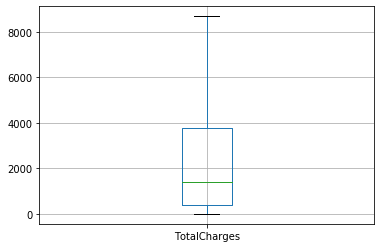

In [40]:
df.boxplot(column='TotalCharges');

- We can see in `TotalCharges` that the median is lower than the mean, and most of customers pay lower prizes.

In [41]:
#change yes and no columns into 1 and 0
#for col in df.select_dtypes("object").columns:
#    if sorted(df[col].unique())==["No","Yes"]:
#        df[col] = (df[col] == "Yes").astype("int")
#df["gender"] = (df["gender"] == "Male").astype("int")

In [42]:
def print_graphs(df):
    df = df
    temp_raw_data=df.copy()
    fig = plt.figure(figsize = (14,14))
    ax = fig.gca()
    temp_raw_data.hist(ax = ax)
    fig = ax.get_figure()

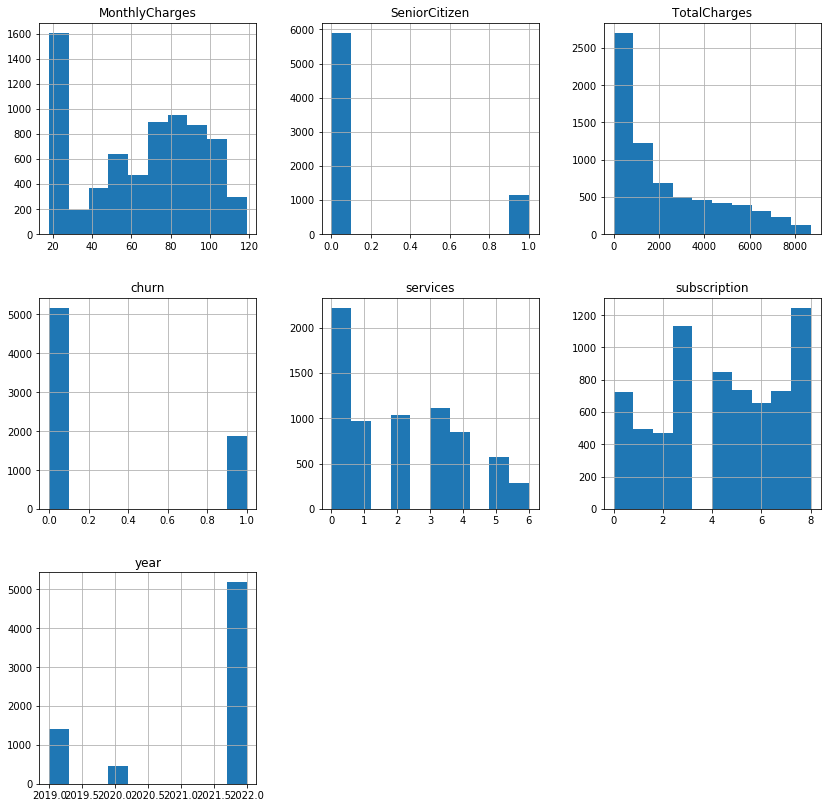

In [43]:
print_graphs(df)

- MonthlyCharges has two picks between 75-80 and 89-96, means that most of clients pay around 75-96 $
- most of clients are young people
- The class imbalance is not very high
- The period of subscription has a pick from 7 to 8 years
- In 2021, there was an increasement in the quantity of new customers.

**Looking for correlation between features and the target**

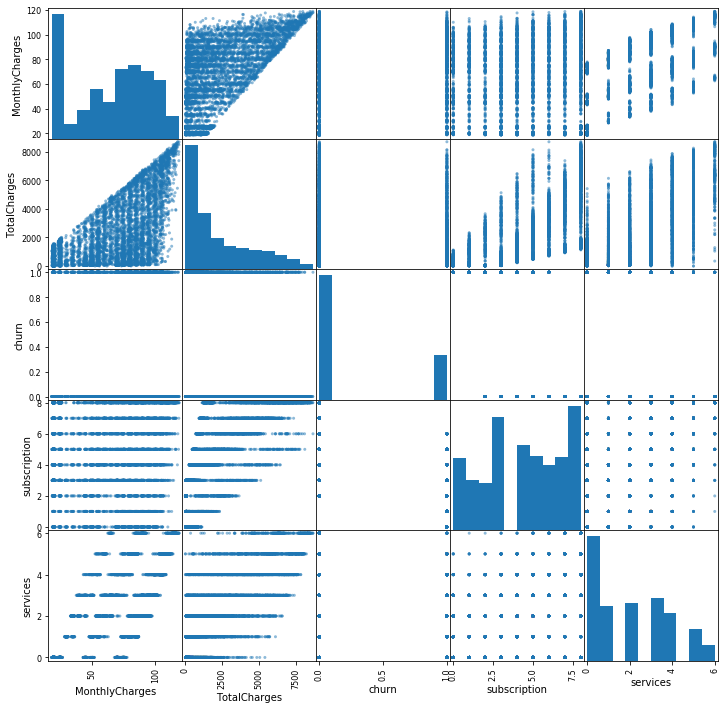

In [44]:
plot_1 = df.drop(columns=['customerID','gender','SeniorCitizen',
                              'Partner','Dependents','InternetService','OnlineSecurity',
                              'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                              'StreamingMovies','MultipleLines','year','month'], axis=1)
pd.plotting.scatter_matrix(plot_1, figsize=(12, 12))
plt.show()

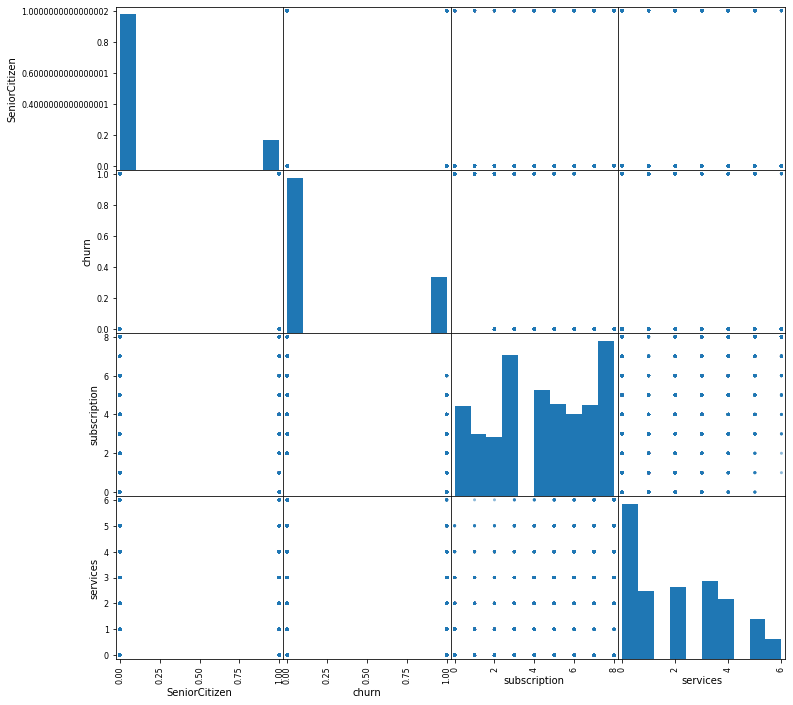

In [45]:
plot_2 = df.drop(columns=['customerID','Type','PaperlessBilling','PaymentMethod',
                              'MonthlyCharges','TotalCharges','InternetService','OnlineSecurity',
                              'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                              'StreamingMovies','year','month'], axis=1)
pd.plotting.scatter_matrix(plot_2, figsize=(12, 12));

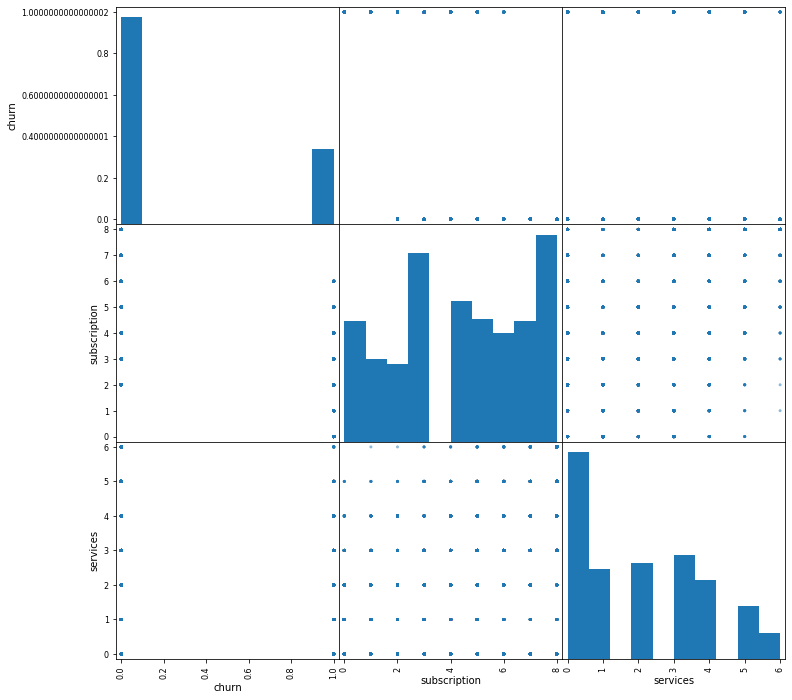

In [46]:
plot_3 = df.drop(columns=['customerID','Type','PaperlessBilling','PaymentMethod',
                              'MonthlyCharges','TotalCharges','gender','SeniorCitizen',
                              'Partner','Dependents','InternetService',
                              'MultipleLines','year','month'], axis=1)
pd.plotting.scatter_matrix(plot_3, figsize=(12, 12));

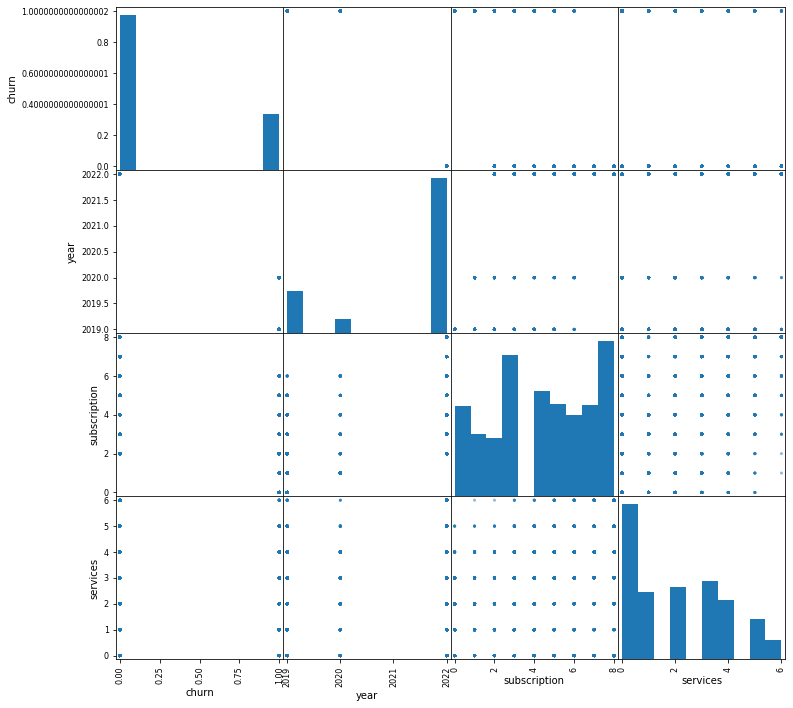

In [47]:
plot_4 = df.drop(columns=['customerID','Type','PaperlessBilling','PaymentMethod',
                              'MonthlyCharges','TotalCharges','gender','SeniorCitizen',
                              'Partner','Dependents','OnlineSecurity','OnlineBackup',
                              'DeviceProtection','TechSupport','StreamingTV',
                              'StreamingMovies','MultipleLines'], axis=1)
pd.plotting.scatter_matrix(plot_4, figsize=(12, 12));

**We check the correlation between different variables with the correlation matrix**

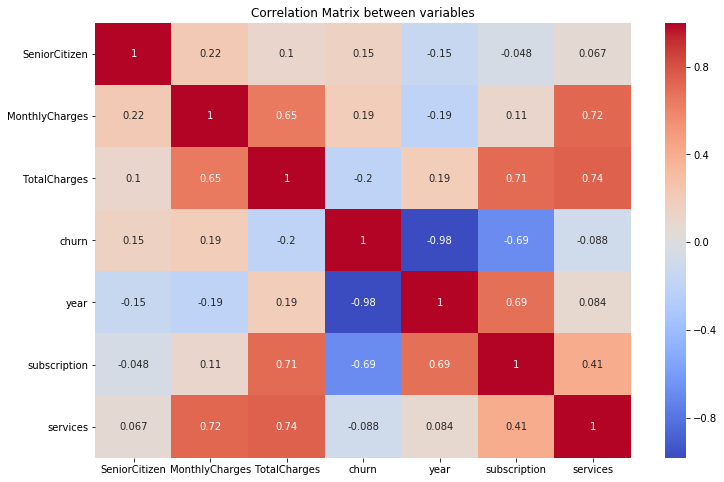

In [48]:
plt.figure(figsize=(12, 8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between variables')
plt.show();

We can see that some features are highly correlated:
- `subscription` and `TotalCharges` are 85% positively correlated 
- `subscription` and `year` are 73% positively correlated 
- `subscription` and `services` are 60% positively correlated 
- `services` and `TotalCharges` are 72% positively correlated 
- `services` and `MonthlyCharges` are 64% positively correlated 


- `churn` and `year` are 98% negatively correlated 
- `churn` and `subscription` are 73% negatively correlated 
- `churn` and `services` are 29% negatively correlated 

**Correlation between TotalCharges/MonthlyCharges and churn**

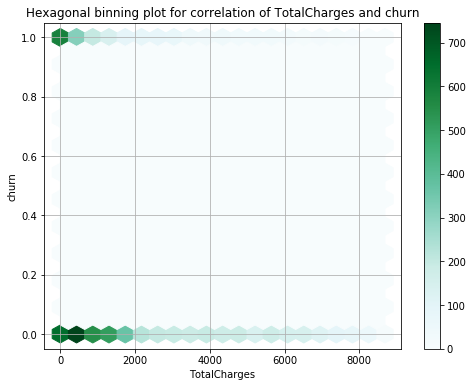

In [49]:
df.plot(x='TotalCharges', y='churn', title = 'Hexagonal binning plot for correlation of TotalCharges and churn', 
        kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

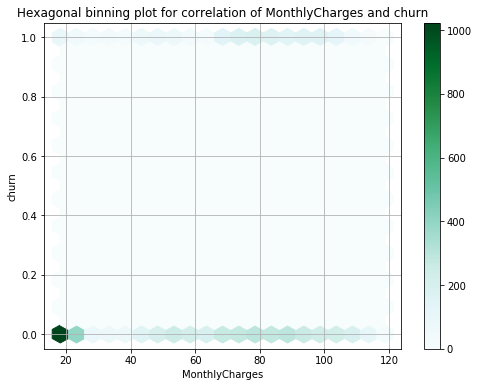

In [50]:
df.plot(x='MonthlyCharges', y='churn', title = 'Hexagonal binning plot for correlation of MonthlyCharges and churn', 
        kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

**Correlation between subscription and churn**

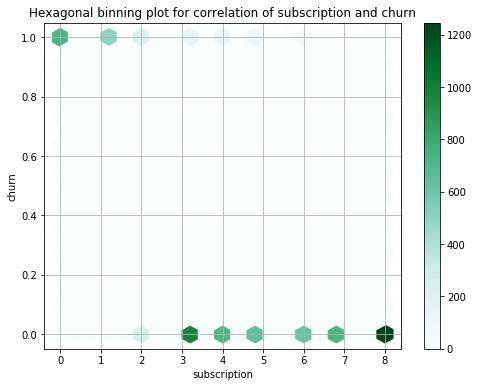

In [51]:
df.plot(x='subscription', y='churn', title = 'Hexagonal binning plot for correlation of subscription and churn', 
    kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

From the plots above we can conclude that:

- There is a strong negative relationship between churn and subscription period, which means that clients that are freshly subscribed are less likely to churn.
- From the correlation between `churn` and `TotalCharges` we can conclude that clients who pay less are less likely to churn.

*****************************************************************************

 In order draw analytical statements about the dataset's distribution, we're going to answer some questions:
- What is the most used payment method and how to classify clients based on their payment method?
- What features influence total charges?
    - payment type
    - gender

**What is the most used payment method/type**

- `Type` 

In [52]:
count_payment_type = (df['Type'].value_counts() / df['Type'].value_counts().sum() * 100).tolist()   

# unique payment type
payment_type = df['Type'].value_counts().reset_index().rename(columns={'index': 'Type', 'Type': 'count'})
payment_type['percentage (%)'] = ['{:.2f}'.format(x) for x in count_payment_type]
payment_type

,Type,count,percentage (%)
0,Month-to-month,3875,55.02
1,Two year,1695,24.07
2,One year,1473,20.91


- `PaymentMethod`

In [53]:
count_payment_method = (df['PaymentMethod'].value_counts() / df['PaymentMethod'].value_counts().sum() * 100).tolist()   

payment_method = df['PaymentMethod'].value_counts().reset_index().rename(columns={'index': 'PaymentMethod', 'PaymentMethod': 'count'})
payment_method['percentage (%)'] = ['{:.2f}'.format(x) for x in count_payment_method]
payment_method

,PaymentMethod,count,percentage (%)
0,Electronic check,2365,33.58
1,Mailed check,1612,22.89
2,Bank transfer (automatic),1544,21.92
3,Credit card (automatic),1522,21.61


**payment method by the total charges?**

In [54]:
PaymentMethod_TotalCharges = df.groupby('PaymentMethod', as_index=False).agg({'TotalCharges': 'sum'}).sort_values(by='TotalCharges', ascending=False)
PaymentMethod_TotalCharges

,PaymentMethod,TotalCharges
2,Electronic check,4944903.25
0,Bank transfer (automatic),4748279.90
1,Credit card (automatic),4671593.35
3,Mailed check,1691392.20


- Most clients used Month to month payment type for their plan (over 61%)
- Most clients used Electronic check as payment method
- Clients making the electronic check as payment method have the highest total charges

**Does gender have an influence on the total charges**

In [55]:
gender_TotalCharges = df.groupby('gender', as_index=False).agg({'TotalCharges': 'sum'}).sort_values(by='TotalCharges', ascending=False)
gender_TotalCharges['percentage (%)'] = gender_TotalCharges['TotalCharges'] / sum(gender_TotalCharges['TotalCharges']) * 100
gender_TotalCharges

,gender,TotalCharges,percentage (%)
1,Male,8103814.5,50.471658
0,Female,7952354.2,49.528342


- The male and female have almost the same total charges, which means that the gender doesnt affect the total charges.

## Conclusion

By Checking and analysing the general distribution of the data

- We've seen in `TotalCharges` that the median is lower than the mean, and most of customers pay lower prizes.
- Most of clients pay around 75-96 $ in `MonthlyCharges` 
- Most of clients are young people
- The class imbalance is not very high
- Most of subscription are between 7 to 8 years
- In 2021, there was an increasement in the quantity of new customers.
- `churn` is highly correlated with `year`, `subscription`.
- Clients that are freshly subscribed are less likely to churn.
- Clients who pay less are less likely to churn.
- Most clients used Month to month payment type for their plan.
- Most clients used Electronic check as payment method.
- Clients making the electronic check as payment method have the highest total charges.
- The male and female have almost the same total charges, which means that the gender doesnt affect the total charges.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Preprocessing and EDA looks good, except for the issue with dataframes merge!

</div>

# <a id="3">Model Training

- This is a supervised-classification learning problem.

- The Target feature: the `EndDate` column equals `No` for non-churned customers

For the model training part we will prepare the dataset before building models, by:
- Spliting the dataset into 70% for the training, 30% for the test
- We will choose as a:
    - Primary metric: AUC-ROC.
    - Additional metric: Accuracy.
- We will encode our categorical features
- Normalize our variables using StandardScaler for data Standardization.
- Examine the balance of classes

For the model building part, we will:
- Use different models including:
    - decision tree model
    - Logistic Regression
    - Random Forest
    - CatBoost
- And apply hyperparameter tuning

************************************************************

### Features encoding

- Before encoding features, let's drop unnecessary ones for our machine learning modeling part

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
EndDate_column      7043 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
churn          

In [57]:
df_final = df.drop(['customerID', 'BeginDate', 'EndDate', 'EndDate_column', 'dayofweek', 'month', 'year', 'subscription'], axis=1)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Features that could leak target were dropped

</div>

In [58]:
df_final.head(2)

,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,churn,services
0,Female,0,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL,No,Yes,No,No,No,No,0,1
1,Male,0,No,No,One year,No,Mailed check,56.95,1889.50,No,DSL,Yes,No,Yes,No,No,No,0,2


In [59]:
y = df_final.churn
X = df_final.drop(['churn'], axis=1)

# 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test

</div>

In [60]:
features_train = X_train.copy()
features_test = X_test.copy()#copy to keep the original data from changes

# select numerical columns
numerical_columns = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64','float32']]

# list of categorical variables
s = (features_train.dtypes == 'object')
categorical_columns = list(s[s].index)
print('Categorical features')
print()
print(categorical_columns)

Categorical features

['gender', 'Partner', 'Dependents', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


Let's move to the encoding 

- Ordinal Encoding:

In [61]:
ordinal_X_train = features_train.copy()
ordinal_X_test = features_test.copy()

ordinal_encoder = OrdinalEncoder()
ordinal_X_train[categorical_columns] = ordinal_encoder.fit_transform(features_train[categorical_columns])
ordinal_X_test[categorical_columns] = ordinal_encoder.transform(features_test[categorical_columns])

- One-Hot Encoding

In [62]:
df_ohe = pd.get_dummies(df_final, drop_first=True)

y_ohe = df_ohe['churn']
X_ohe = df_ohe.drop(['churn'], axis=1)

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.25, random_state=12345)

numerical_ohe = [cname for cname in X_train_ohe.columns if X_train_ohe[cname].dtype in ['float64', 'int64']]

<div class="alert alert-success">
<b>Reviewer's comment</b>

Categorical features were encoded

</div>

- Let's normalize our variables using StandardScaler

In [63]:
scaler = StandardScaler()
scaler.fit(X_train_ohe[numerical_ohe])

X_train_ohe[numerical_ohe] = scaler.transform(X_train_ohe[numerical_ohe])
X_test_ohe[numerical_ohe]  = scaler.transform(X_test_ohe[numerical_ohe])

<div class="alert alert-success">
<b>Reviewer's comment</b>

Scaling is done correctly

</div>

- We encoded our categorical features using both ordianl encoding and one hit encoding, 
- scaled the data with StandardScaler, 

**Evaluation metrics**

In [64]:
def evaluation_metrics(y_test, test_predictions):
    print("\033[1m" + 'F1 score: ' + "\033[0m", '{:.2f}'.format(f1_score(y_test, test_predictions)))
    print("\033[1m" + 'Accuracy: ' + "\033[0m", '{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'Precision: ' + "\033[0m", '{:.3f}'.format(precision_score(y_test, test_predictions)))
    print("\033[1m" + 'Recall: ' + "\033[0m", '{:.3f}'.format(recall_score(y_test, test_predictions)))
    print("\033[1m" + 'Balanced Accuracy Score: ' + "\033[0m", '{:.2%}'.format(balanced_accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'AUC-ROC: ' + "\033[0m", '{:.2%}'.format(roc_auc_score(y_test, test_predictions)))
    print()
    print("\033[1m" + 'Confusion Matrix' + "\033[0m")
    print('-'*50)
    print(confusion_matrix(y_test, test_predictions))
    print()
    print("\033[1m" + 'Classification report' + "\033[0m")
    print('-'*50)
    print(classification_report(y_test, test_predictions))
    print()

- We will first train our baseline dummy classifier model

**Baseline model**

In [65]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(features_train, y_train)
dummy_model_predictions = dummy_model.predict(features_test)

In [66]:
evaluation_metrics(y_test, dummy_model_predictions)

F1 score:  0.00
Accuracy:  73.08%
Precision:  0.000
Recall:  0.000
Balanced Accuracy Score:  50.00%
AUC-ROC:  50.00%

Confusion Matrix
--------------------------------------------------
[[1287    0]
 [ 474    0]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1287
           1       0.00      0.00      0.00       474

    accuracy                           0.73      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.53      0.73      0.62      1761




- The baseline model has a 50.00% and a low accuracy of 67.16%. this performance is normal because this is just the baseline.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, we have a baseline!

</div>

**Check Class imbalance**

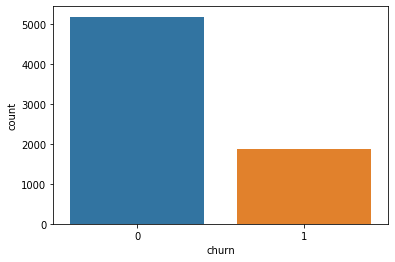

In [67]:
sns.countplot(df_final["churn"]);

- We see that the imbalance is not very high.

- Let's try the upsampling

In [68]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(
    ordinal_X_train, y_train, 2)

0    0.636002
1    0.363998
dtype: float64

Accuracy after upsampling: 0.762


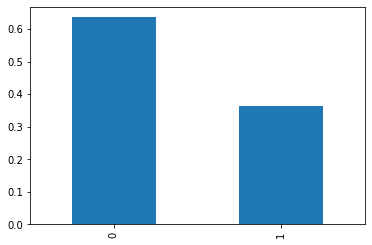

In [69]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled) # train the model 
test_predictions = pd.Series(model.predict(ordinal_X_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');
print()
print('Accuracy after upsampling: {:.3f}'.format(accuracy_score(y_test, test_predictions)))

- Now the classes are more balanced, let's build our models.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

While it's great that you're using upsampling to deal with class imbalance, the repeat value of 5 doesn't seem to make sense (in the original train set, there are ~3000 examples of class 0 and ~1500 of class 1, which means a reasonable repeat value is 2; while repeat value of 5 will create imbalance in the other way: 3000 examples of class 0 and 5 * 1500 = 7500 examples of class 1).
    
Other than that, I don't see what the number of examples of each class in the test set predictions have to do with balancing. We're never balancing the test set, and the number of predcitions of each class need not be balanced.

</div>

**Model building**

In [70]:
def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['no churn', 'churn']); ax.yaxis.set_ticklabels(['no churn', 'churn'])

In [71]:
# upsampled train dataset for ordinal encoded training set
ordinal_X_train_upsampled, y_train_upsampled = upsample(
    ordinal_X_train, y_train, 5)

In [72]:
# upsampled train dataset for one-hot encoded data
X_train_ohe_upsampled, y_train_ohe_upsampled = upsample(
    X_train_ohe, y_train_ohe, 5)

In [73]:
# upsampled train dataset
X_train_upsampled, y_train_upsampled = upsample(
    X_train, y_train, 5)

<div class="alert alert-warning">
<b>Reviewer's comment</b>

As far as I can tell, you're not actually using upsampled train set anywhere below, but note that if you wanted to do it with cross-validation, it would create a data leakage problem. There could be the same exact examples in some or all cross-validation folds' train and validation subsets. To use upsampling with cross-validation correctly, check out [imblearn](https://imbalanced-learn.org/stable/index.html) (in particular, [pipelines](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html#imblearn.pipeline.Pipeline) and [oversamplers](https://imbalanced-learn.org/stable/references/over_sampling.html))

</div>

**Logistic regression**

- Hyperparameter tuning

In [74]:
%%time
grid_logreg = {
    "C": [0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# define the model
logreg_clf = LogisticRegression(random_state = 12345)

grid_search_logreg = GridSearchCV(
    estimator = logreg_clf,
    param_grid = grid_logreg,
    scoring = 'roc_auc',
    cv = 10
)
logreg_cv = grid_search_logreg.fit(X_train_ohe, y_train_ohe)

print('Best hyperparams are: {}'.format(logreg_cv.best_params_))


Best hyperparams are: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
CPU times: user 5.15 s, sys: 5.66 s, total: 10.8 s
Wall time: 10.8 s


- Train the model

In [75]:
def train_logistic_regression(X_train, y_train):
    global logreg_model
    logreg_model = LogisticRegression(**grid_search_logreg.best_params_)
    logreg_model.fit(X_train, y_train)

- Model's predictions

In [76]:
def logistic_regression_prediction(X_test, y_test):
    global logreg_pred, logreg_pred_proba
    logreg_pred = logreg_model.predict(X_test)
    logreg_pred_proba = logreg_model.predict_proba(X_test)[:, 1]
    print("\033[1m" + 'AUC-ROC Score and Accuracy using Logistic Regression Classifier : ' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, logreg_pred_proba)))
    logreg_accuracy = accuracy_score(y_test, logreg_pred)
    print('Accuracy score: {:.2%}'.format(logreg_accuracy))
    print()
    log_model_importance = pd.DataFrame(
        logreg_model.coef_[0], index=X_train_ohe.columns, columns=["Importance"]
    )
    log_model_importance.sort_values(by="Importance").plot(kind="bar", figsize=(12, 6))
    plt.xticks(rotation=45, ha="right", rotation_mode="anchor", fontsize=13)
    plt.xlabel("Logistic Regression Classifier Feature Importance")
    plt.show()

In [77]:
%%time
train_logistic_regression(X_train_ohe, y_train_ohe)

CPU times: user 236 ms, sys: 212 ms, total: 447 ms
Wall time: 397 ms


AUC-ROC Score and Accuracy using Logistic Regression Classifier : 
AUC-ROC Score: 83.49%
Accuracy score: 80.07%



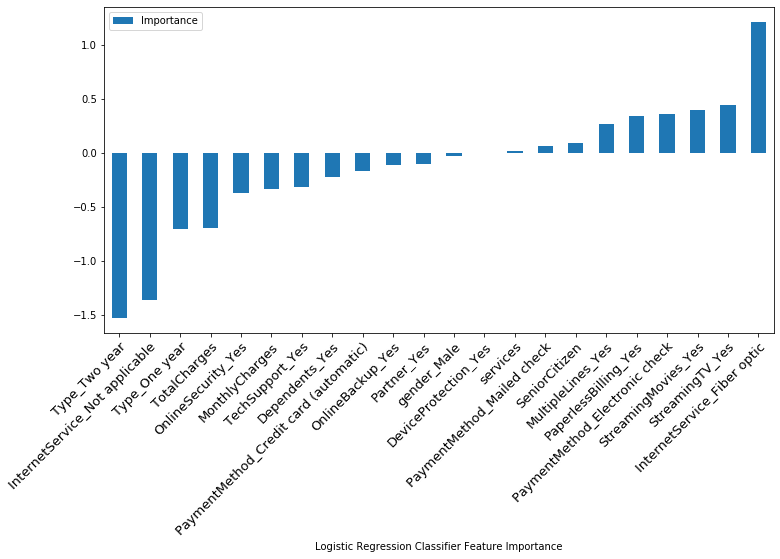

CPU times: user 398 ms, sys: 68.3 ms, total: 467 ms
Wall time: 506 ms


In [78]:
%%time
logistic_regression_prediction(X_test_ohe, y_test_ohe)

- Confusion Matrix

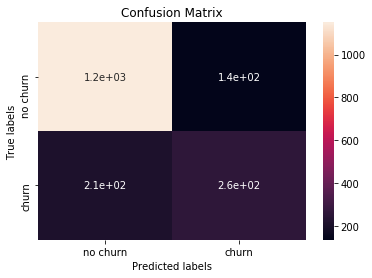

In [79]:
plot_confusion_matrix(y_test, logreg_pred)

**Decision Tree**

- Hyperparameter tuning

In [80]:
%%time

grid_dt = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [None, 2, 4, 8],
    "min_samples_split" : [2, 4, 8],
    "min_samples_leaf" : [2, 4, 6]
}
dt_clf = DecisionTreeClassifier(random_state = 12345)

grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid = grid_dt, cv=5, scoring = 'roc_auc')
dt_cv = grid_search_dt.fit(ordinal_X_train, y_train)
print('The best hyperparameters are: {}'.format(dt_cv.best_params_))

The best hyperparameters are: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
CPU times: user 4.41 s, sys: 0 ns, total: 4.41 s
Wall time: 4.42 s


- Train the model

In [81]:
def train_decision_tree(X_train, y_train):
    global dt_model
    dt_model = DecisionTreeClassifier(**grid_search_dt.best_params_)
    dt_model.fit(X_train, y_train)

- Model's predictions

In [82]:
def decision_tree_prediction(X_test, y_test):
    global dt_pred, dt_pred_proba
    dt_pred = dt_model.predict(X_test)
    dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]
    print("\033[1m" + 'AUC-ROC Score and Accuracy using Decision Tree Classifier: ' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, dt_pred_proba)))
    dt_accuracy = accuracy_score(y_test, dt_pred)
    print('Accuracy score: {:.2%}'.format(dt_accuracy))
    print()
    sorted_feature_importance = dt_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(ordinal_X_train.columns[sorted_feature_importance], 
             dt_model.feature_importances_[sorted_feature_importance], 
             color='blue')
    plt.xlabel("Decision Tree Classifier Feature Importance")

In [83]:
%%time
train_decision_tree(ordinal_X_train, y_train)

CPU times: user 8.7 ms, sys: 0 ns, total: 8.7 ms
Wall time: 8.31 ms


AUC-ROC Score and Accuracy using Decision Tree Classifier: 
AUC-ROC Score: 82.16%
Accuracy score: 77.17%

CPU times: user 24.8 ms, sys: 0 ns, total: 24.8 ms
Wall time: 23.4 ms


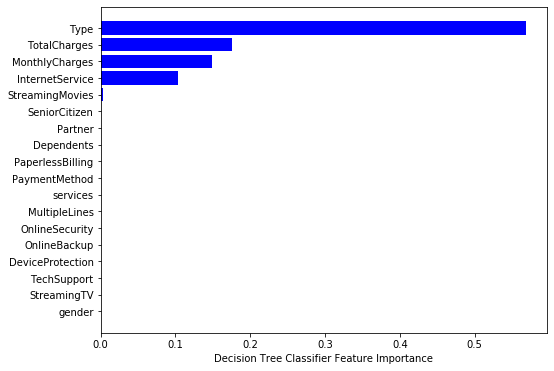

In [84]:
%%time
decision_tree_prediction(ordinal_X_test, y_test)

- Confusion Matrix

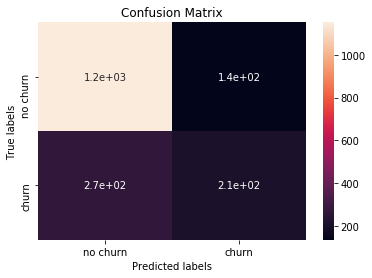

In [85]:
plot_confusion_matrix(y_test, dt_pred)

**Random Forest**

- Hyperparameter tuning

In [86]:
%%time

grid_rf = {
    "criterion" : ["gini", "entropy"],
    "n_estimators" : [10, 25, 50],
    "max_depth" : [None, 2, 4, 8],
    "min_samples_leaf" : [2, 4, 6]
}
rf_clf = RandomForestClassifier(random_state = 12345)
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid = grid_rf, cv=5, scoring = 'roc_auc')
rf_cv = grid_search_rf.fit(ordinal_X_train, y_train)
print('The best hyperparameters are: {}'.format(rf_cv.best_params_))

The best hyperparameters are: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 25}
CPU times: user 28.2 s, sys: 0 ns, total: 28.2 s
Wall time: 28.2 s


- Train the model

In [87]:
def train_random_forest(X_train, y_train):
    global rf_model
    rf_model = RandomForestClassifier(**grid_search_rf.best_params_)
    rf_model.fit(X_train, y_train)

- Model's predictions

In [88]:
def random_forest_prediction(X_test, y_test):
    global rf_pred, rf_pred_proba
    rf_pred = rf_model.predict(X_test)
    rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    print("\033[1m" + 'AUC-ROC Score and Accuracy using Random Forest Classifier' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, rf_pred_proba)))
    rf_accuracy = accuracy_score(y_test, rf_pred)
    print('Accuracy score: {:.2%}'.format(rf_accuracy))
    print()
    sorted_feature_importance = rf_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(ordinal_X_train.columns[sorted_feature_importance], 
             rf_model.feature_importances_[sorted_feature_importance], 
             color='blue')
    plt.xlabel("Random Forest Classifier Feature Importance")

In [89]:
%%time
train_random_forest(ordinal_X_train, y_train)

CPU times: user 82.1 ms, sys: 0 ns, total: 82.1 ms
Wall time: 89.6 ms


AUC-ROC Score and Accuracy using Random Forest Classifier
AUC-ROC Score: 83.65%
Accuracy score: 78.36%

CPU times: user 38.3 ms, sys: 0 ns, total: 38.3 ms
Wall time: 36.4 ms


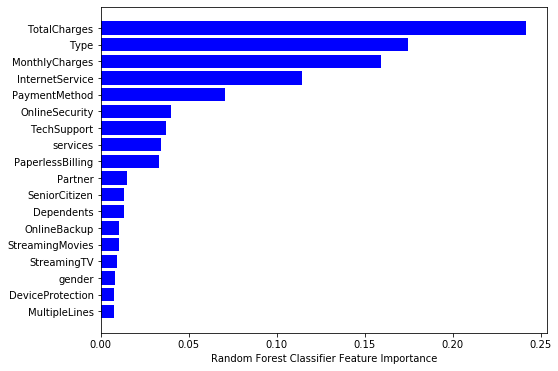

In [90]:
%%time
random_forest_prediction(ordinal_X_test, y_test)

- Confusion Matrix

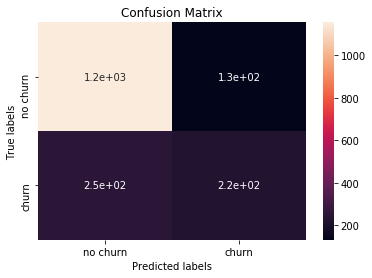

In [91]:
plot_confusion_matrix(y_test, rf_pred)

**CatBoost**

- Hyperparameter tuning

In [105]:
%%time
grid_cb = {'learning_rate': [0.001, 0.01, 0.5],
        'depth': [4, 6],
        'l2_leaf_reg': [1, 3, 5]
       }
cb_clf = CatBoostClassifier(
    iterations=50,
    cat_features = categorical_columns,
    logging_level = 'Silent',
    eval_metric='AUC',
    early_stopping_rounds = 50,
    random_state = 12345)
grid_search_cb = GridSearchCV(estimator = cb_clf, param_grid = grid_cb, scoring="roc_auc", cv=5)
cb_cv = grid_search_cb.fit(X_train, y_train)
print('The best hyperparameters are: {}'.format(cb_cv.best_params_))


The best hyperparameters are: {'depth': 4, 'l2_leaf_reg': 5, 'learning_rate': 0.5}
CPU times: user 59 s, sys: 9.63 s, total: 1min 8s
Wall time: 4min 8s


- Train the model

In [106]:
def train_catboost(X_train, y_train, X_test, y_test):
    global cb_model
    cb_model = CatBoostClassifier(**grid_search_cb.best_params_)
    cb_model.fit(X_train, y_train, cat_features = categorical_columns, eval_set=(X_test, y_test), verbose=False, plot=False)

- Model's predictions

In [107]:
def catboost_prediction(X_test, y_test):
    global cb_pred, cb_pred_proba
    cb_pred = cb_model.predict(X_test)
    cb_pred_proba = cb_model.predict_proba(X_test)[:, 1]
    print("\033[1m" + 'AUC-ROC Score and Accuracy using CatBoost Classifier' + "\033[0m")
    print('AUC-ROC Score: {:.2%}'.format(roc_auc_score(y_test, cb_pred_proba)))
    cb_accuracy = accuracy_score(y_test, cb_pred)
    print('Accuracy score: {:.2%}'.format(cb_accuracy))
    print()
    sorted_feature_importance = cb_model.feature_importances_.argsort()
    plt.figure(figsize=(8,6))
    plt.barh(X_train.columns[sorted_feature_importance], 
             cb_model.feature_importances_[sorted_feature_importance], 
             color='blue')
    plt.xlabel("CatBoost Feature Importance")

In [108]:
%%time
train_catboost(X_train, y_train, X_test, y_test)

CPU times: user 21.8 s, sys: 3.69 s, total: 25.5 s
Wall time: 27.3 s


AUC-ROC Score and Accuracy using CatBoost Classifier
AUC-ROC Score: 84.42%
Accuracy score: 80.12%

CPU times: user 44.3 ms, sys: 550 µs, total: 44.8 ms
Wall time: 35.7 ms


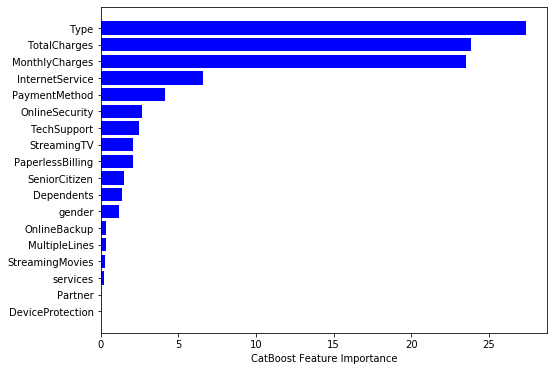

In [109]:
%%time
catboost_prediction(X_test, y_test)

- Confusion Matrix

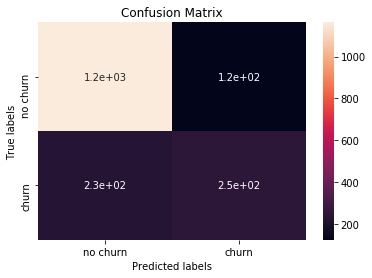

In [110]:
plot_confusion_matrix(y_test, cb_pred)

### Conclusion

We built 4 models, Logistic regression, decision tree, random forest and Catboost classifier. and we can summarize our results bellow:

**Summary of our results**

|**Classifier**| **Time required to train model** | **Time for prediction** | **AUC-ROC** | **Accuracy** |
|---|---|---|---|---|
| Logistic Regression | 594 ms | 509 ms | 83.49% | 80.07% |
| Decision Tree| 7.6 ms | 23.4 ms | 82.16% | 77.17% |
| Random Forest| 91.7 ms | 36.1 ms | 83.70% | 78.36% |
| CatBoost| 30.6 s| 36 ms | 84.42% | 80.12% |

- Taking into account the AUC-ROC score and Accuracy score as an assessment metrics, the best performing model in our case is Catboost classifier with an AUC-ROC score of 84.42% and an Accuracy of 80.12%.

# <a id="4">Final Testing

- Based on the best AUC-ROC and Accuracy score on the training set, we choose Random Forest for the final testing
- Let's evaluate the model on the test set
- Calculate the confusion matrix 

AUC-ROC Score and Accuracy using CatBoost Classifier
AUC-ROC Score: 84.42%
Accuracy score: 80.12%



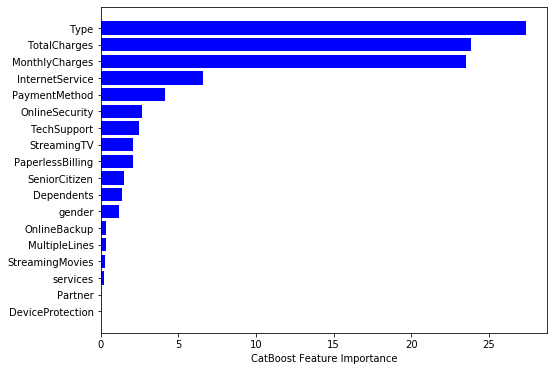

In [112]:
catboost_prediction(X_test, y_test)

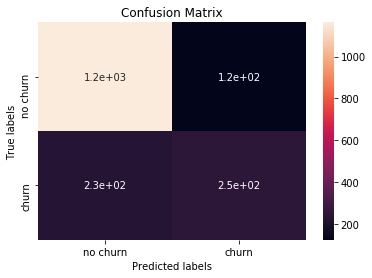

In [113]:
plot_confusion_matrix(y_test, cb_pred)

With an AUC-ROC score of 82.78% and an Accuracy of 76.18% for Random Forest, the features importance shows that `TotalCharges`, `Type`, `MonthlyCharges` and `InternetService` are the most important ones in our case. 

<div class="alert alert-danger">
<b>Reviewer's comment</b>

Alright, you tried a couple of different models and did some hyperaparameter tuning using a cross-validated grid search. The final models were evaluated on the test set. Please check the results after fixing the problem with merging

</div>

# <a id="4">Overall conclusion

The business task of our project is to forecast churn of clients of the telecom operator Interconnect. We did this by following different steps:

- In the data investigation part we've seen that we had 4 datasets:
    - `contract`, `internet`, `personal` and `phone`.
- In the data preprocessing part, we prepared the data by:
    - merging the 4 datasets in one using merge() with inner join.
    - changing features' datatypes to the right datatype for each one
    - creating new columns `EndDate_column`, `churn`, `subscription`, `dayofweek`, `month`, `year`, `services`
- After that we moved to the EDA step where we analysed the general distribution of the data:
    - We've seen in `TotalCharges` that the median is lower than the mean, and most of customers pay lower prizes.
    - Most of clients pay around 75-96 $ in `MonthlyCharges` 
    - Most of clients are young people
    - The class imbalance is not very high
    - Most of subscription are between 7 to 8 years
    - In 2021, there was an increasement in the quantity of new customers.
    - `churn` is highly correlated with `year`, `subscription`.
    - Clients that are freshly subscribed are less likely to churn.
    - Clients who pay less are less likely to churn.
    - Most clients used Month to month payment type for their plan.
    - Most clients used Electronic check as payment method.
    - Clients making the electronic check as payment method have the highest total charges.
    - The male and female have almost the same total charges, which means that the gender doesnt affect the total charges.

- We tackeled the Model building step where:
    - we prepared the dataset before building models, by:
        - Spliting the dataset into 70% for the training, 30% for the test
        - Encoding our categorical features using one hot encoding and ordinal encoding, 
        - Normalizing our variables using StandardScaler for data Standardization.
        - Examine the balance of classes using the upsampling
     - we chosed Logistic regression classifier, Decision Tree, Random Forest and Catboost Classifier.
     - And applied hyperparameter tuning for each.
     
-We observed that:
     - Taking into account the AUC-ROC score and Accuracy score as an assessment metrics, the best performing model in our case is Catboost classifier with an AUC-ROC score of 84.42% and an Accuracy of 80.12%.
- Since our Assessment metrics are AUC-ROC and Auuracy score, we choose Catboost for the final testing that gave us an AUC-ROC score of 84.42% and an Accuracy of 80.12%, the features importance showed that `Type`, `TotalCharges` and`MonthlyCharges` are the top 3 most important ones in our case.

# Project Report

## What steps of the plan were performed and what steps were skipped (explain why)?

For creating a model for churn prediction, we did data transformation, preprocessing, analyzing features, model building, and final testing. All steps planed were performed. 

## What difficulties did you encounter and how did you manage to solve them?

Difficulties encountered when when:
- merging the datasets, and used the inner join, and because of this data were lost. So the best way to merge datasets is to use a left join and fill missing values after that.

## What were some of the key steps to solving the task?

To solve the task we went through:

- Data investigation part.
- Data preprocessing where we prepared the data.
- EDA step where we analysed the general distribution of the data.
- Model building step.
- Final testing of the chosen model.

## What is your final model and what quality score does it have?

My final model after the modification of data merging recommended by the reviewer is Catboost.
- Catboost classifier gave us an AUC-ROC score of 84.42% and an Accuracy of 80.12%, so the model quality in this case is 4.5 SP.